<a href="https://colab.research.google.com/github/dawon974/2025_Heat-Demand-Forecasting_AI/blob/main/2025_06_11_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 폰트 설정 Test

<Figure size 1500x1200 with 0 Axes>

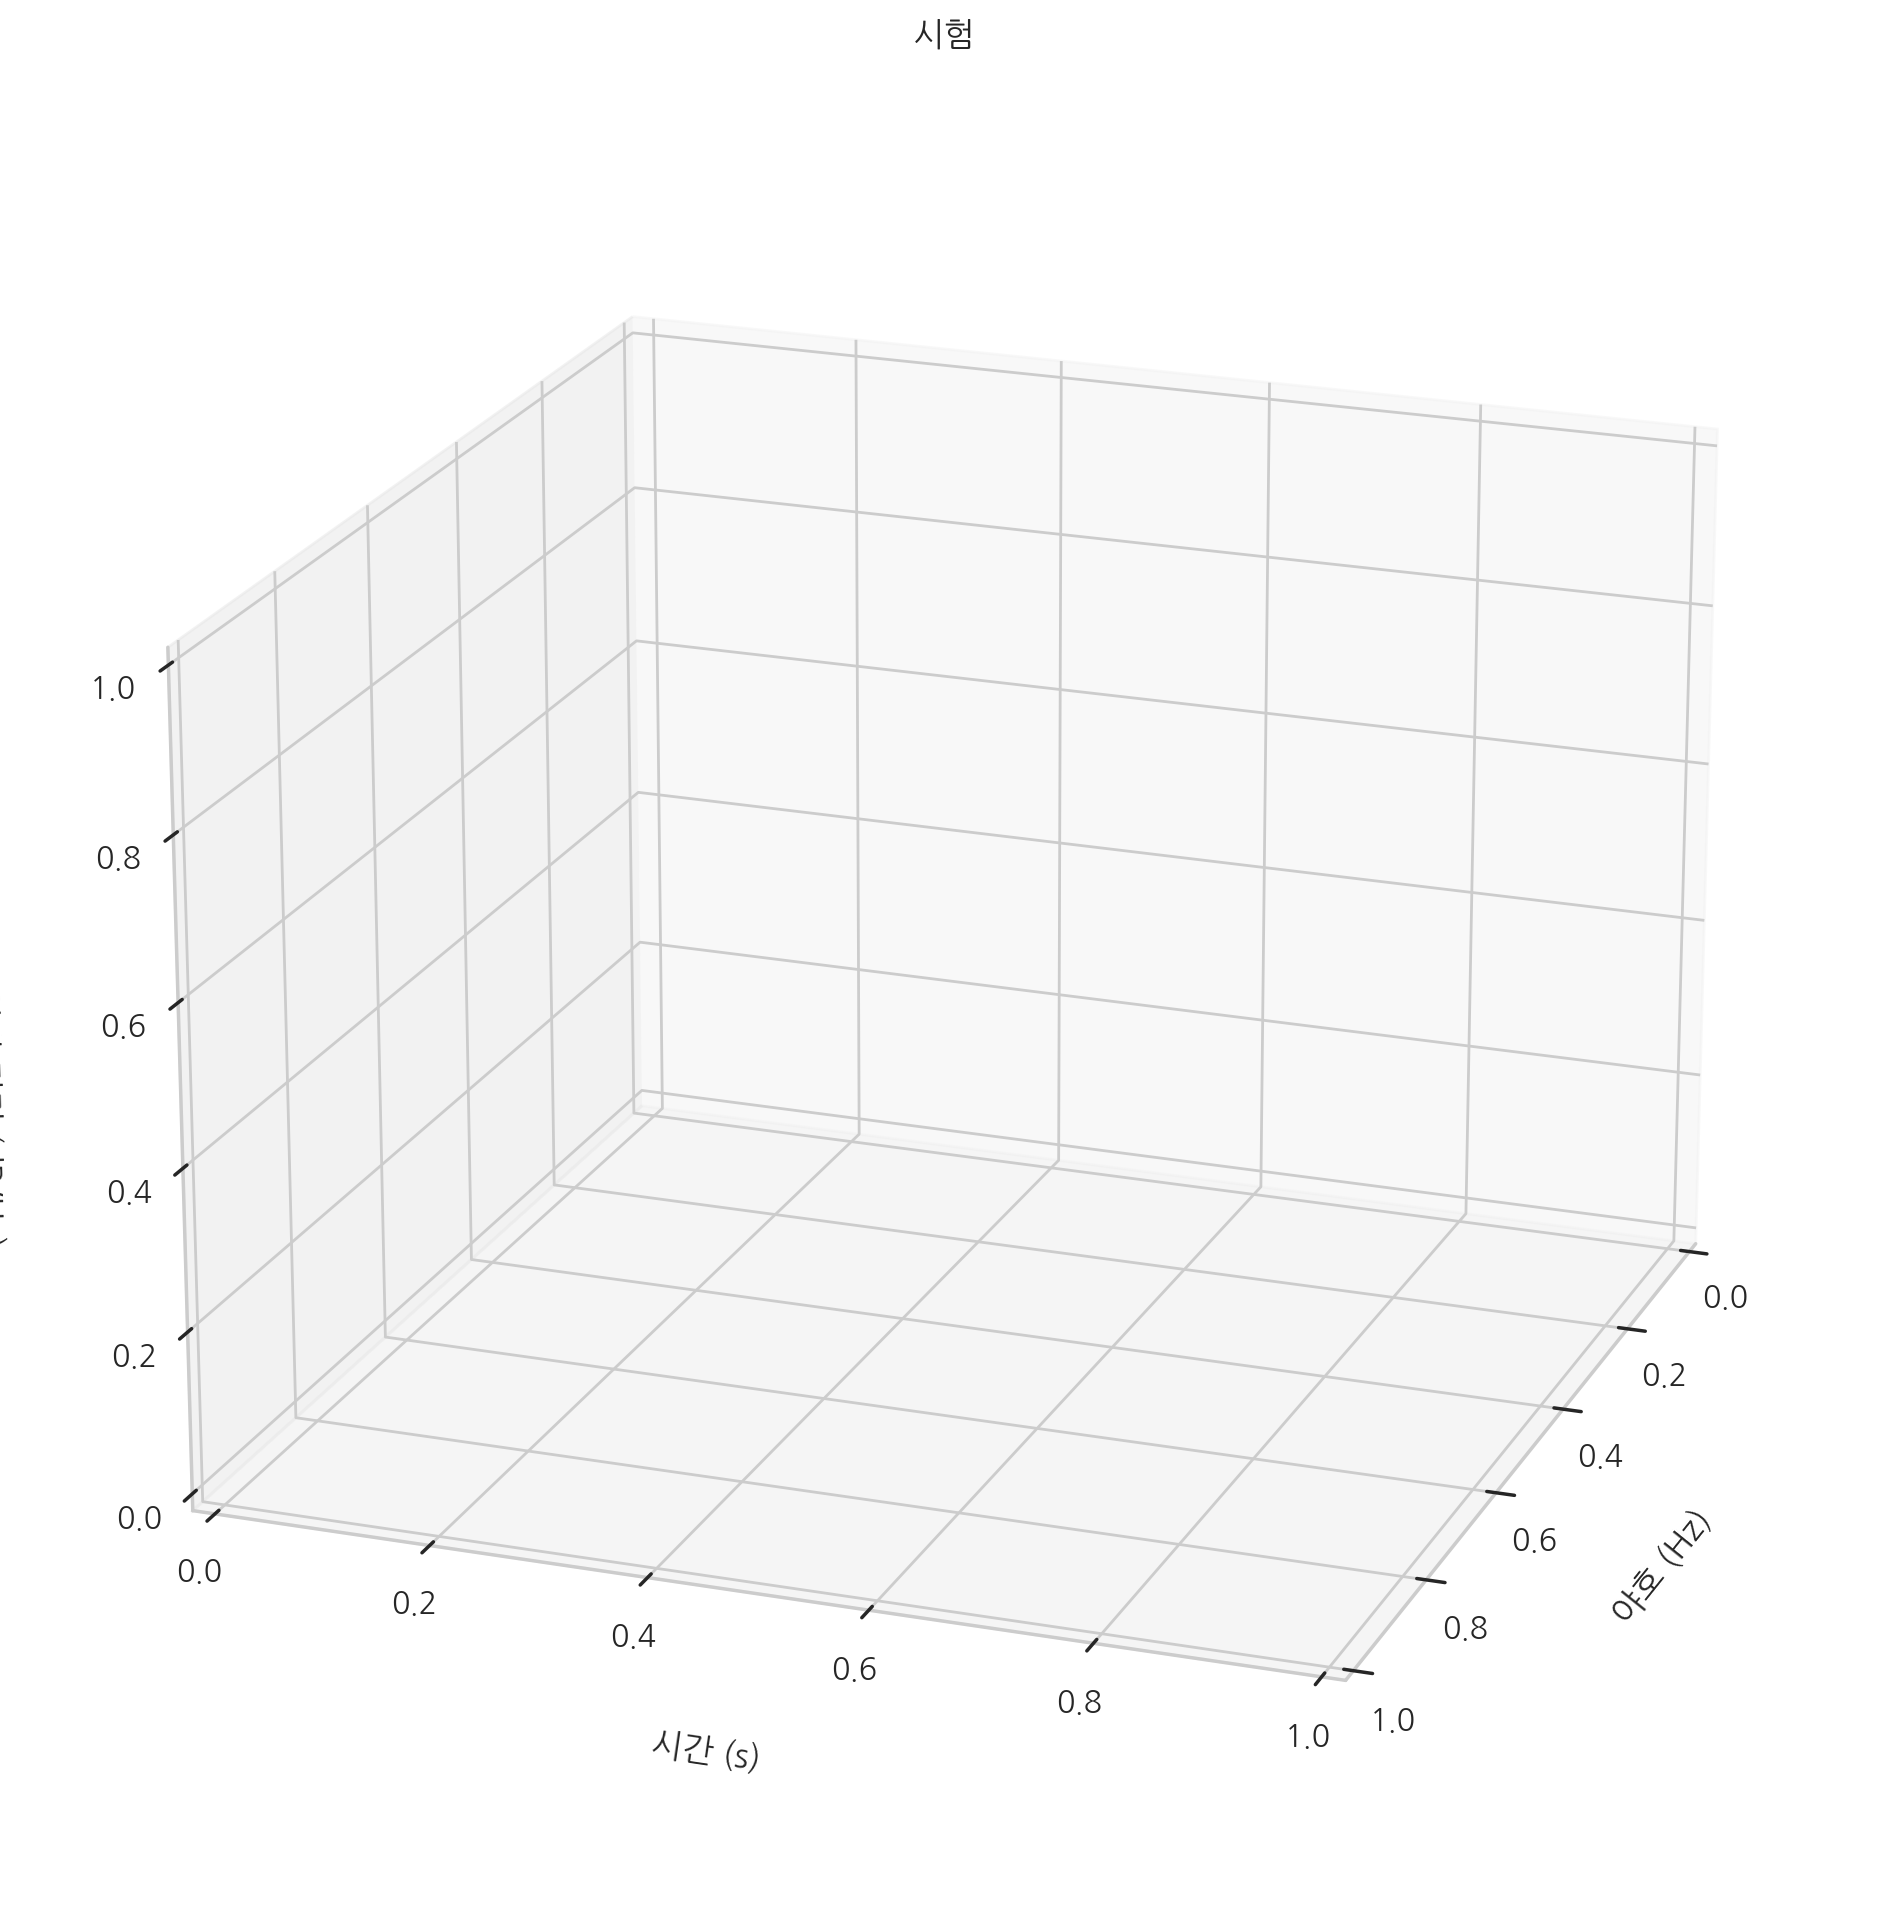

In [16]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/content/drive/MyDrive/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

# 테스트 해보기
fig = plt.figure(figsize=(15, 12))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(15, 12))

graph_title = '시험'
ax.set_title(f'{graph_title}')
ax.set_xlabel('야호 (Hz)', labelpad=20)
ax.set_ylabel('시간 (s)', labelpad=20)
ax.set_zlabel('이건 뭐지 (dB/Hz)', labelpad=20)

ax.view_init(20, 20)
plt.show()

In [23]:
import matplotlib
print(matplotlib.rcParams['font.family'])

['sans-serif']


한글 폰트 설정 완료

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# 나눔고딕 폰트 경로
font_path = '/content/drive/MyDrive/NanumGothic.ttf'  # 정확한 경로 확인 필요
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()  # 실제 폰트 이름 추출

# 전역 설정 적용
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
sns.set(font=font_name)  # seaborn에도 적용

# 확인
print("적용된 폰트 이름:", font_name)
print("matplotlib 설정:", mpl.rcParams['font.family'])

적용된 폰트 이름: NanumGothic
matplotlib 설정: ['NanumGothic']


In [25]:
# Google Drive에서 엑셀 파일 불러오기
file_path = "/content/drive/MyDrive/파주(열공급실적추가)_수정.xlsx"
df = pd.read_excel(file_path)
# 컬럼명 정리
df.columns = df.columns.str.strip()
# 날짜 및 시간 파생 변수 생성
df['일자'] = pd.to_datetime(df['일자'])
df['Hour'] = pd.to_numeric(df['시간'], errors='coerce')
df['Year'] = df['일자'].dt.year
df['Month'] = df['일자'].dt.month
df['Day'] = df['일자'].dt.day
df['Weekday'] = df['일자'].dt.day_name()

결측치 시각화

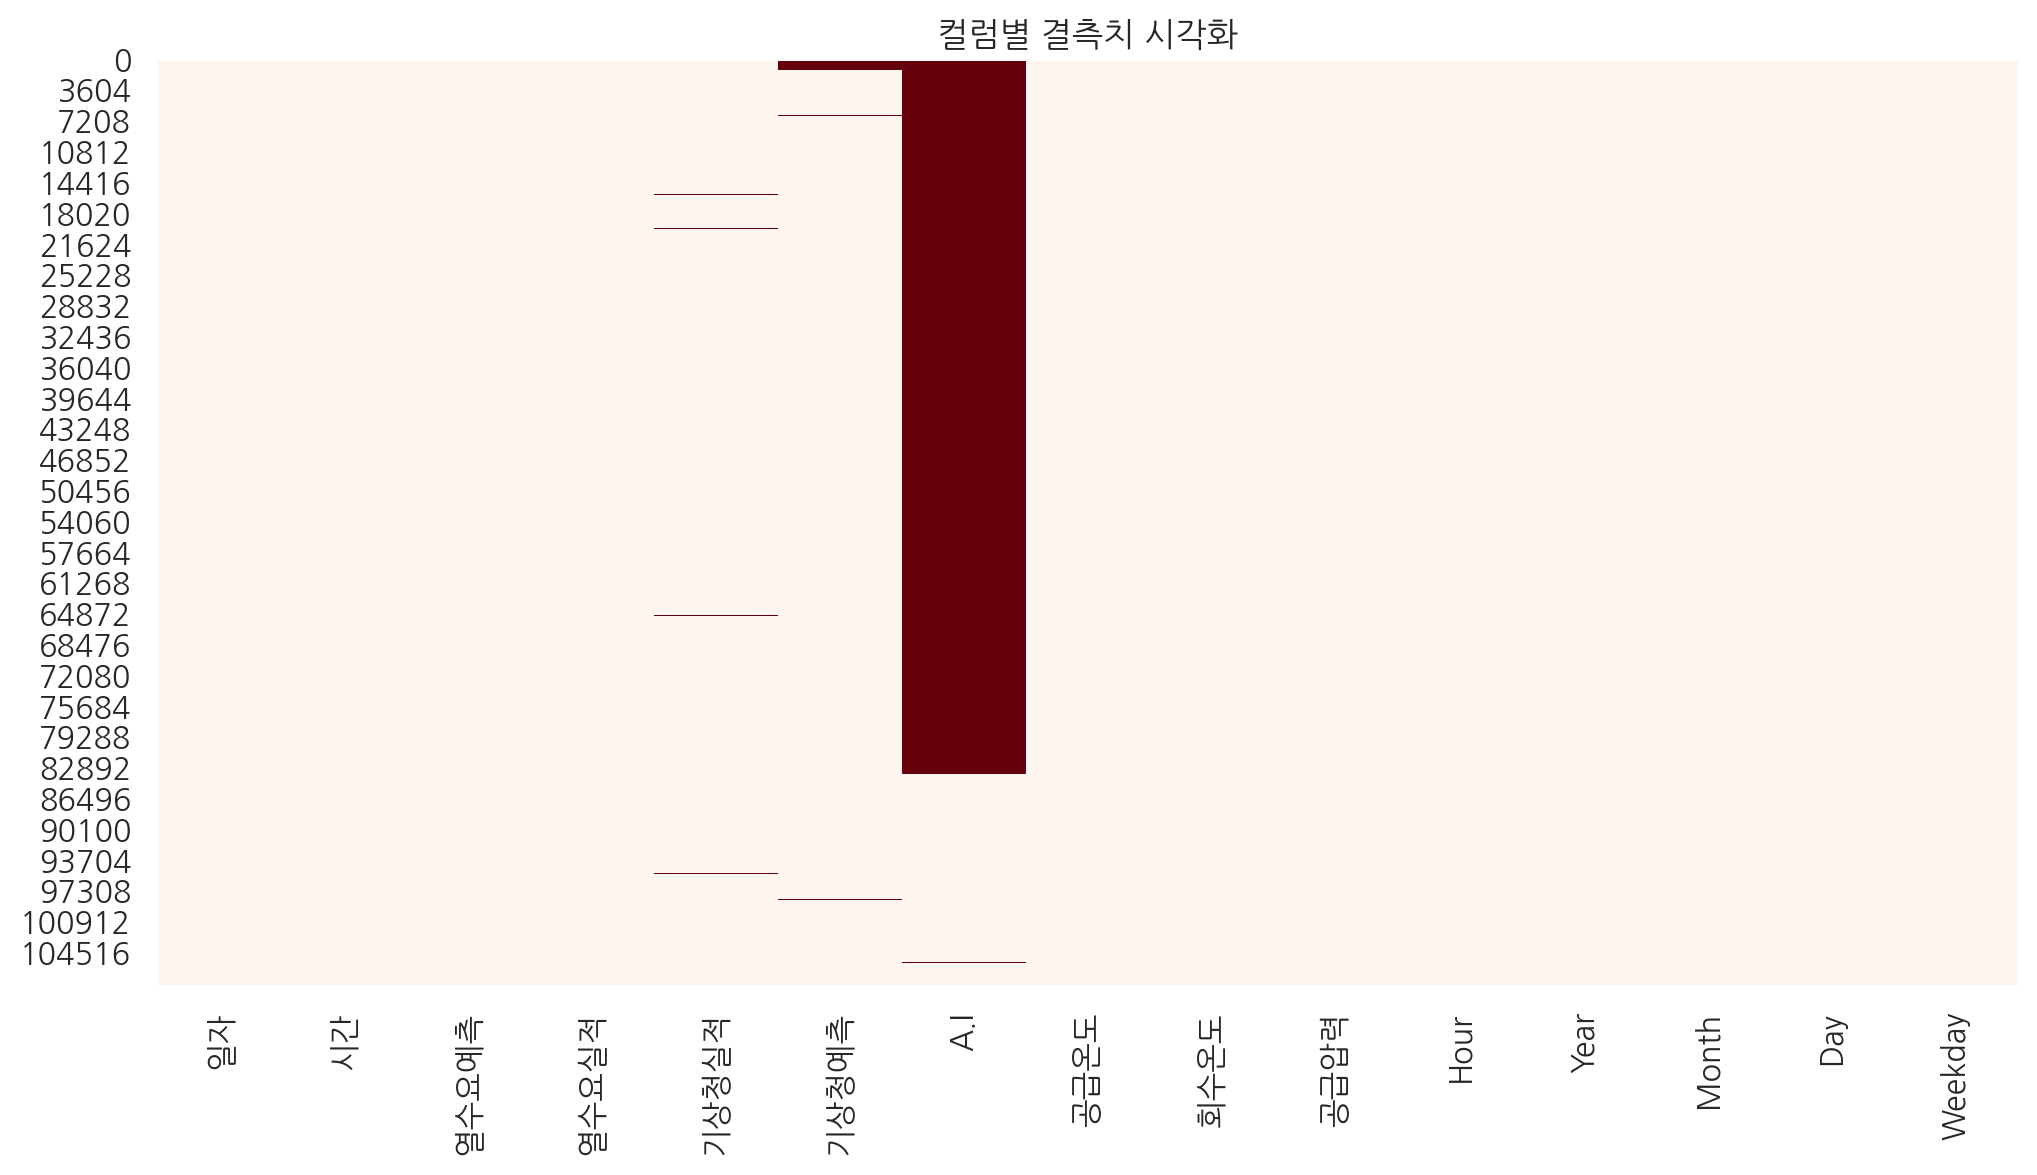

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("컬럼별 결측치 시각화")
plt.show()

*   대부분의 컬럼은 결측치가 없음
*   A.I, 기상청실적, 기상청예측에만 일부 결측치가 집중되어 있음.  
특히 A.I 컬럼은 전체 중 상당 부분이 결측 → 학습 시 주의 필요.


연도별 열수요실적 평균 추이

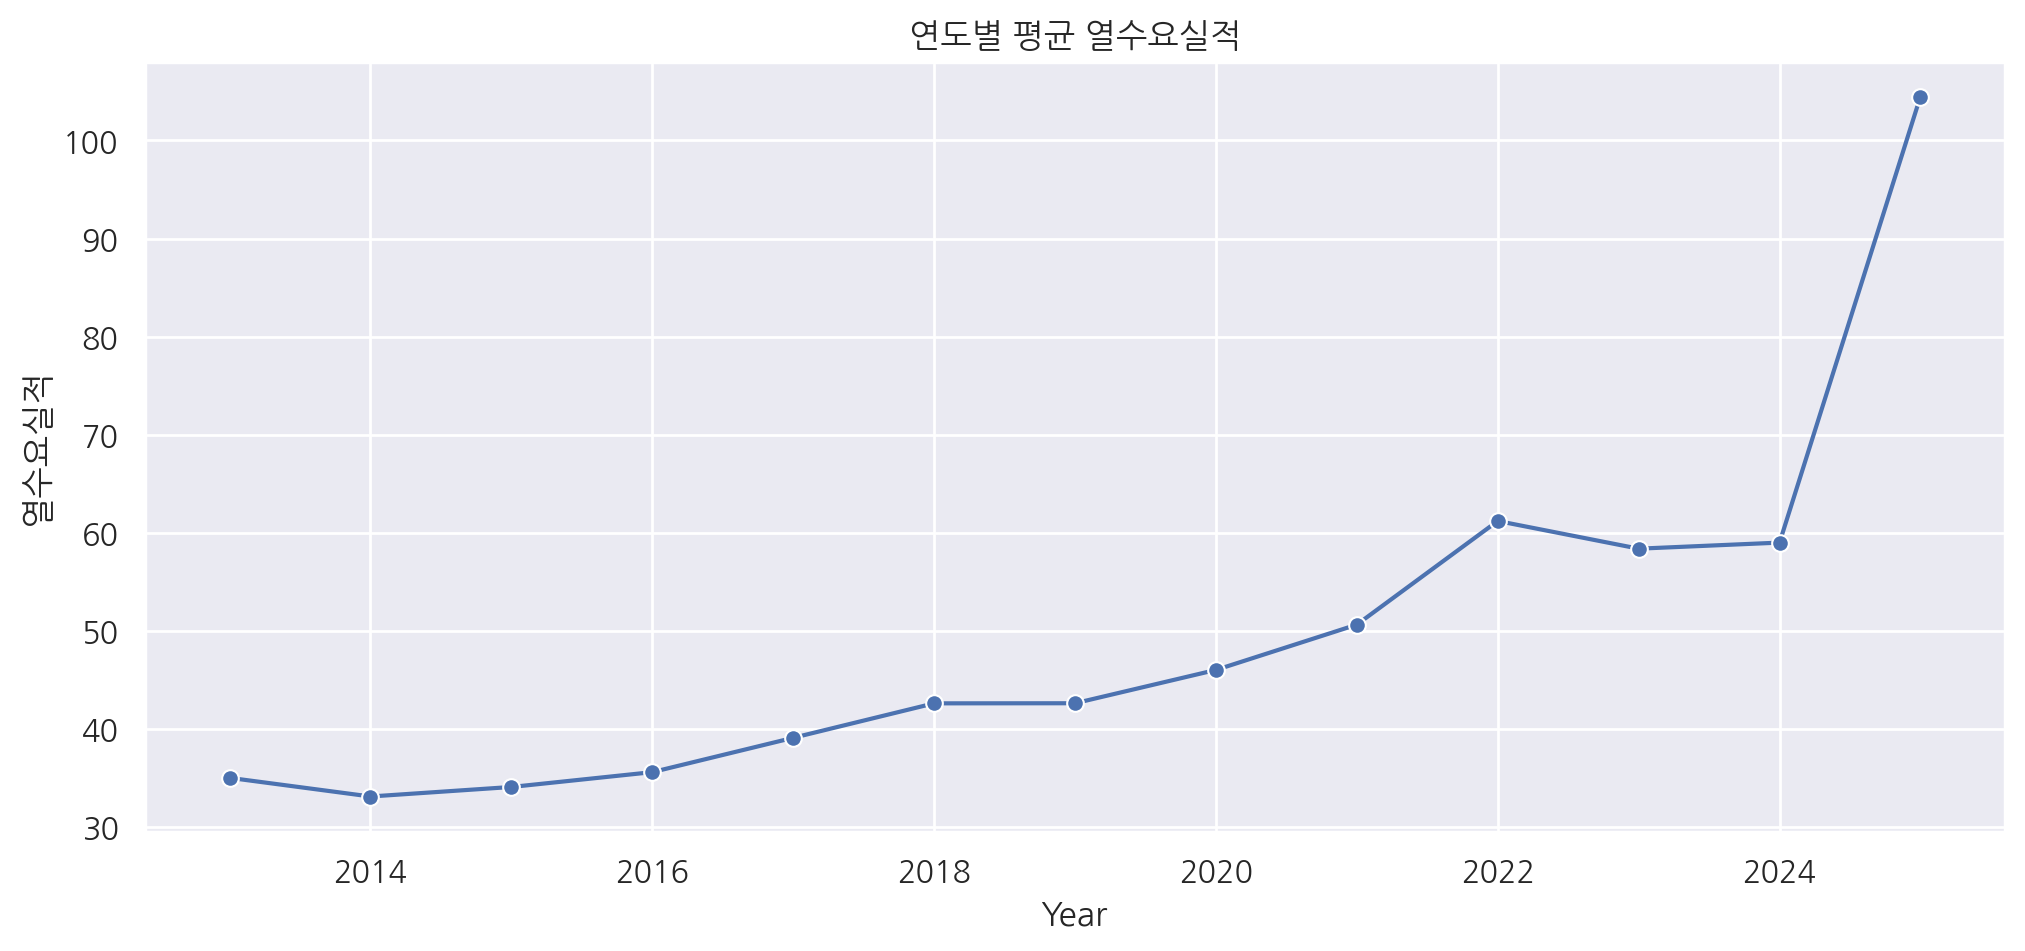

In [27]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df.groupby('Year')['열수요실적'].mean(), marker='o')
plt.title('연도별 평균 열수요실적')
plt.ylabel('열수요실적')
plt.grid(True)
plt.show()

*   열수요는 2013~2020년까지 점진적 상승 추세를 보임.
*   2025년 급증 현상은 데이터 누락/이상값/예측값 포함 가능성 존재.  
계량적 분석 전에 해당 연도 값 검토 필요.

월별 열수요실적 평균

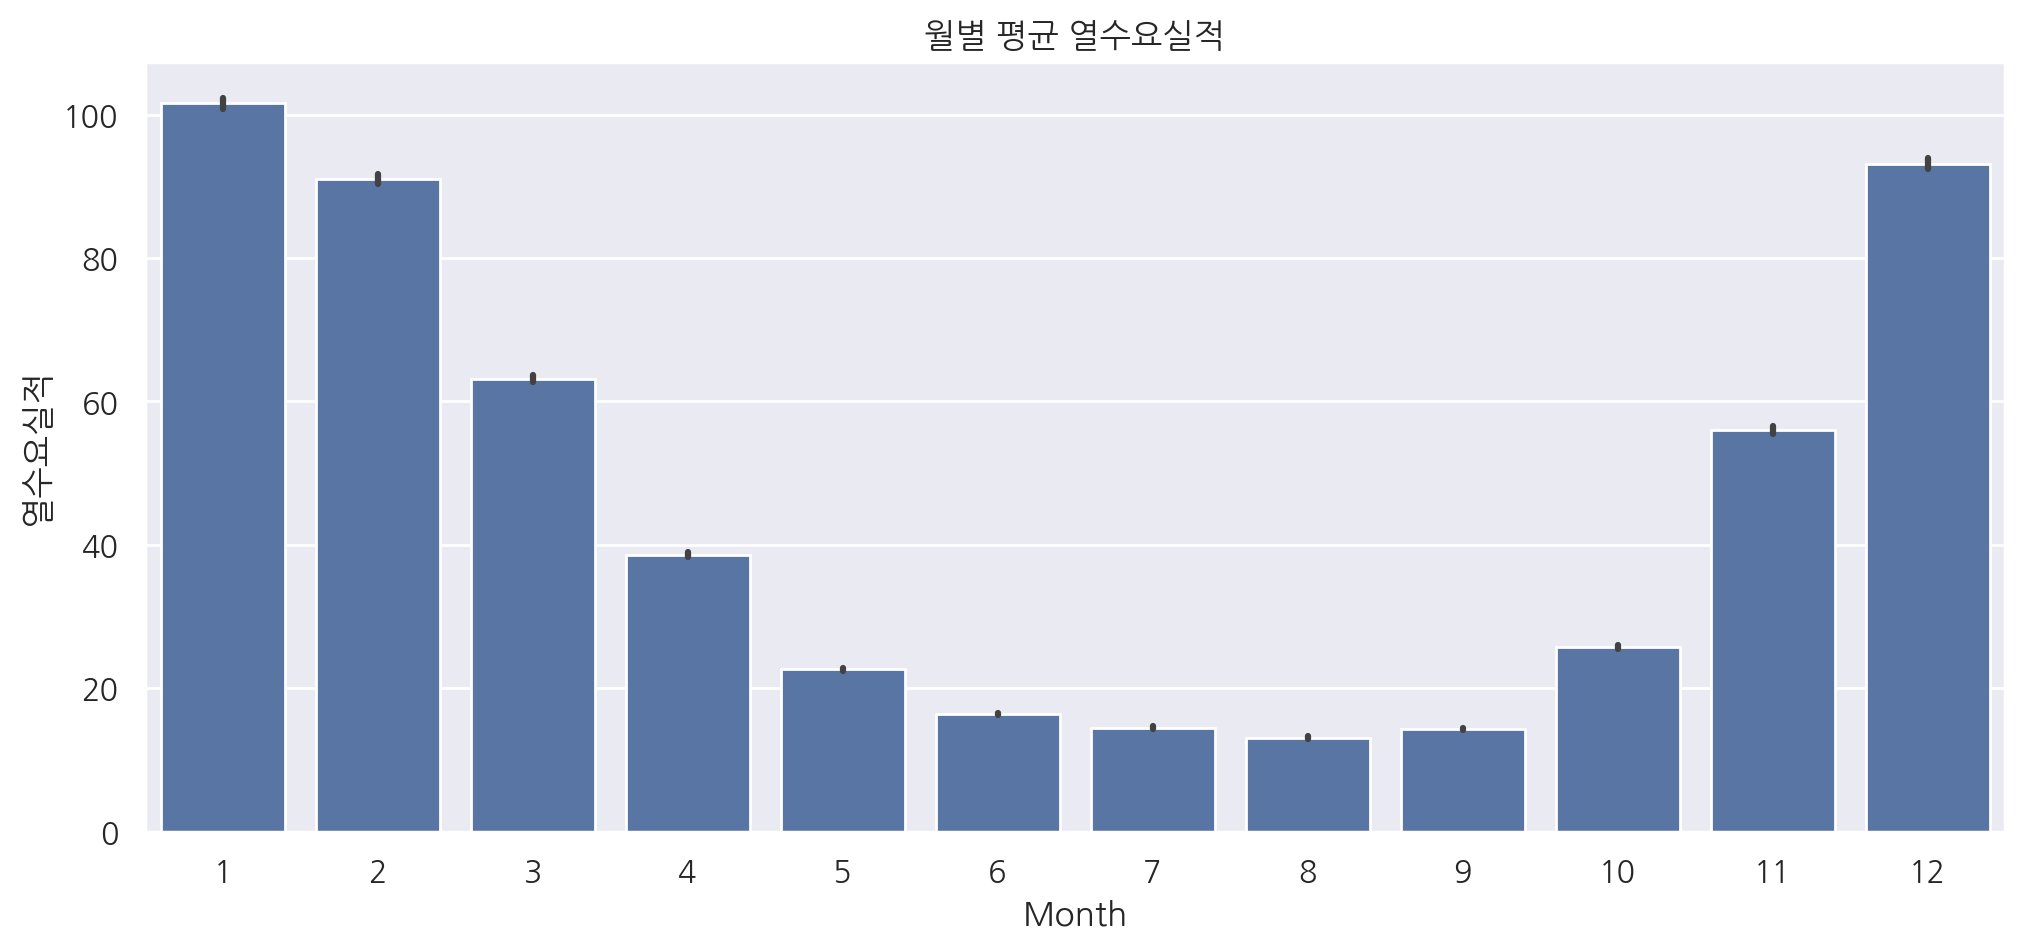

In [28]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Month', y='열수요실적', data=df)
plt.title('월별 평균 열수요실적')
plt.show()

*   1, 2월과 12월은 열수요가 매우 높음 → 겨울철 난방 수요 반영.
*   6~9월은 수요 거의 없음 → 냉방 중심 기간, 열수요 낮음.  
계절성과 기온에 따른 전형적 수요 패턴이 명확하게 드러남.

<ipython-input-29-921396906>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='열수요실적', data=df, ci=None)


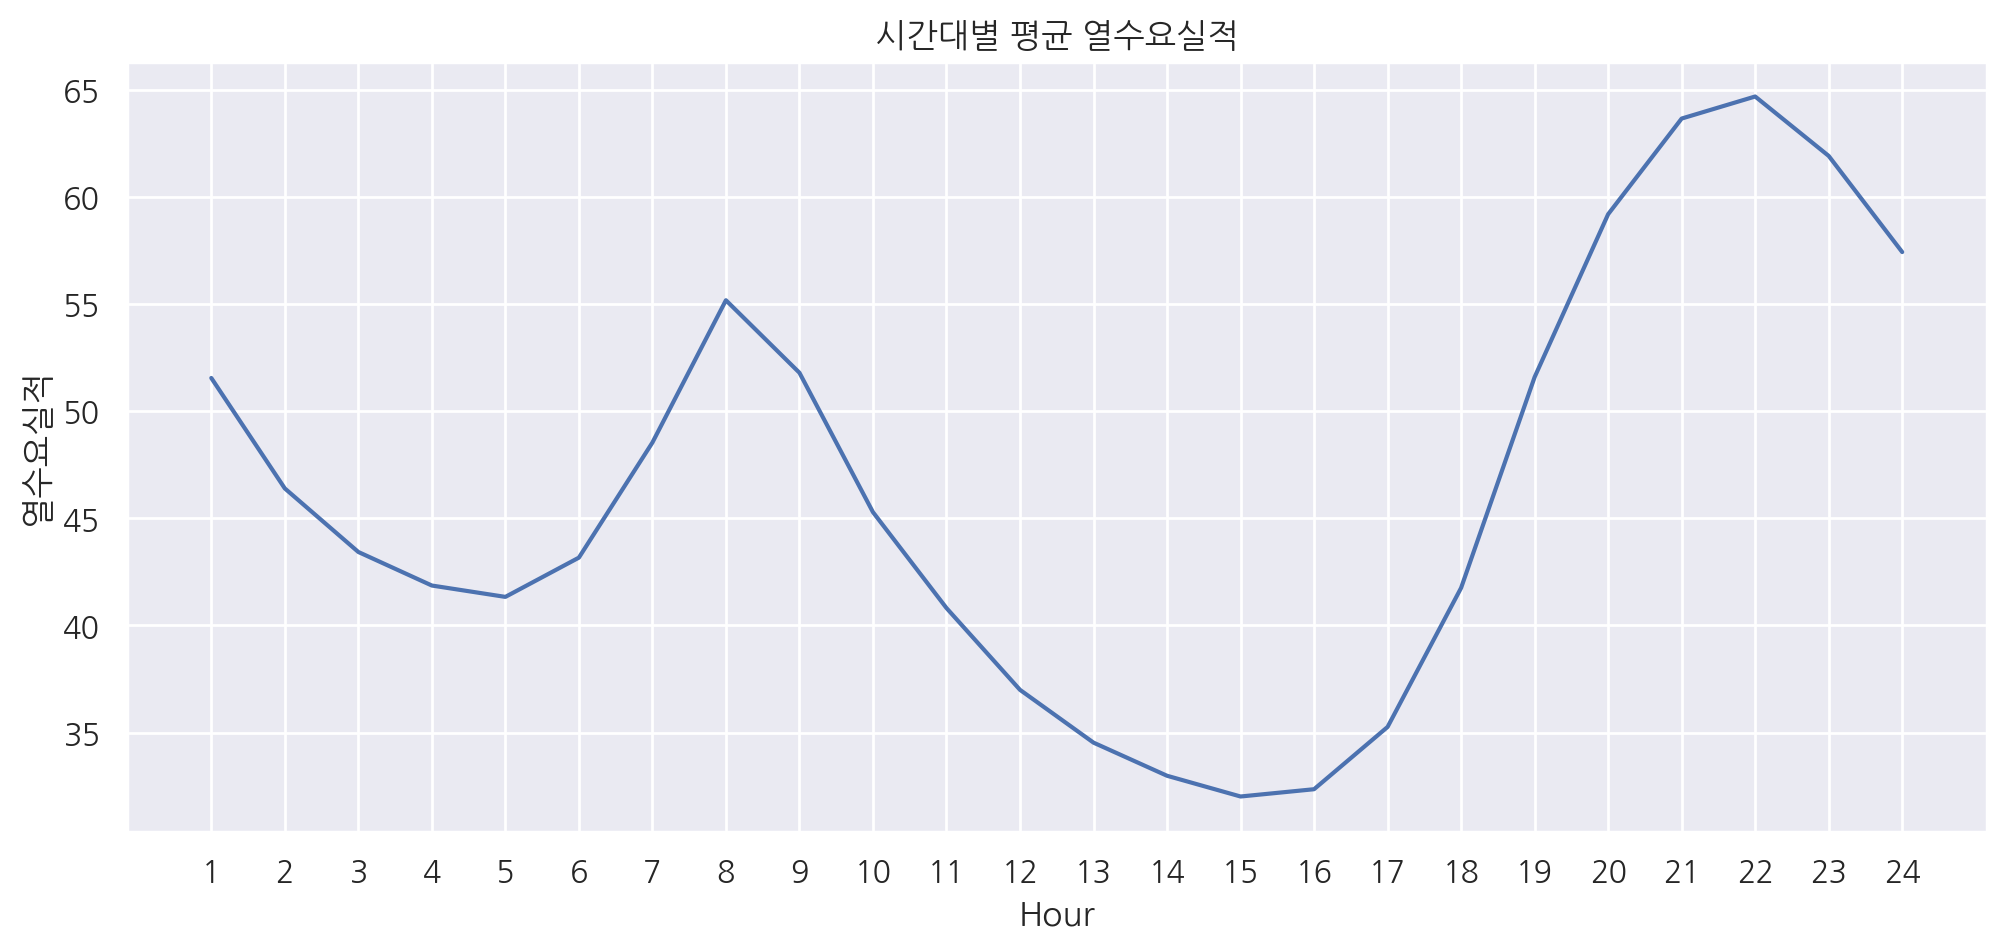

In [29]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Hour', y='열수요실적', data=df, ci=None)
plt.title('시간대별 평균 열수요실적')
plt.xticks(range(1, 25))
plt.grid(True)
plt.show()

*   08시, 19~22시 사이에 수요가 급증함.
*   일반적으로 출근 시간대 / 퇴근 후 시간대에 난방 사용 증가 → 주거/사무시설 수요를 반영함.
*   새벽~오전 초반, 오후 시간대에는 상대적으로 수요 낮음.




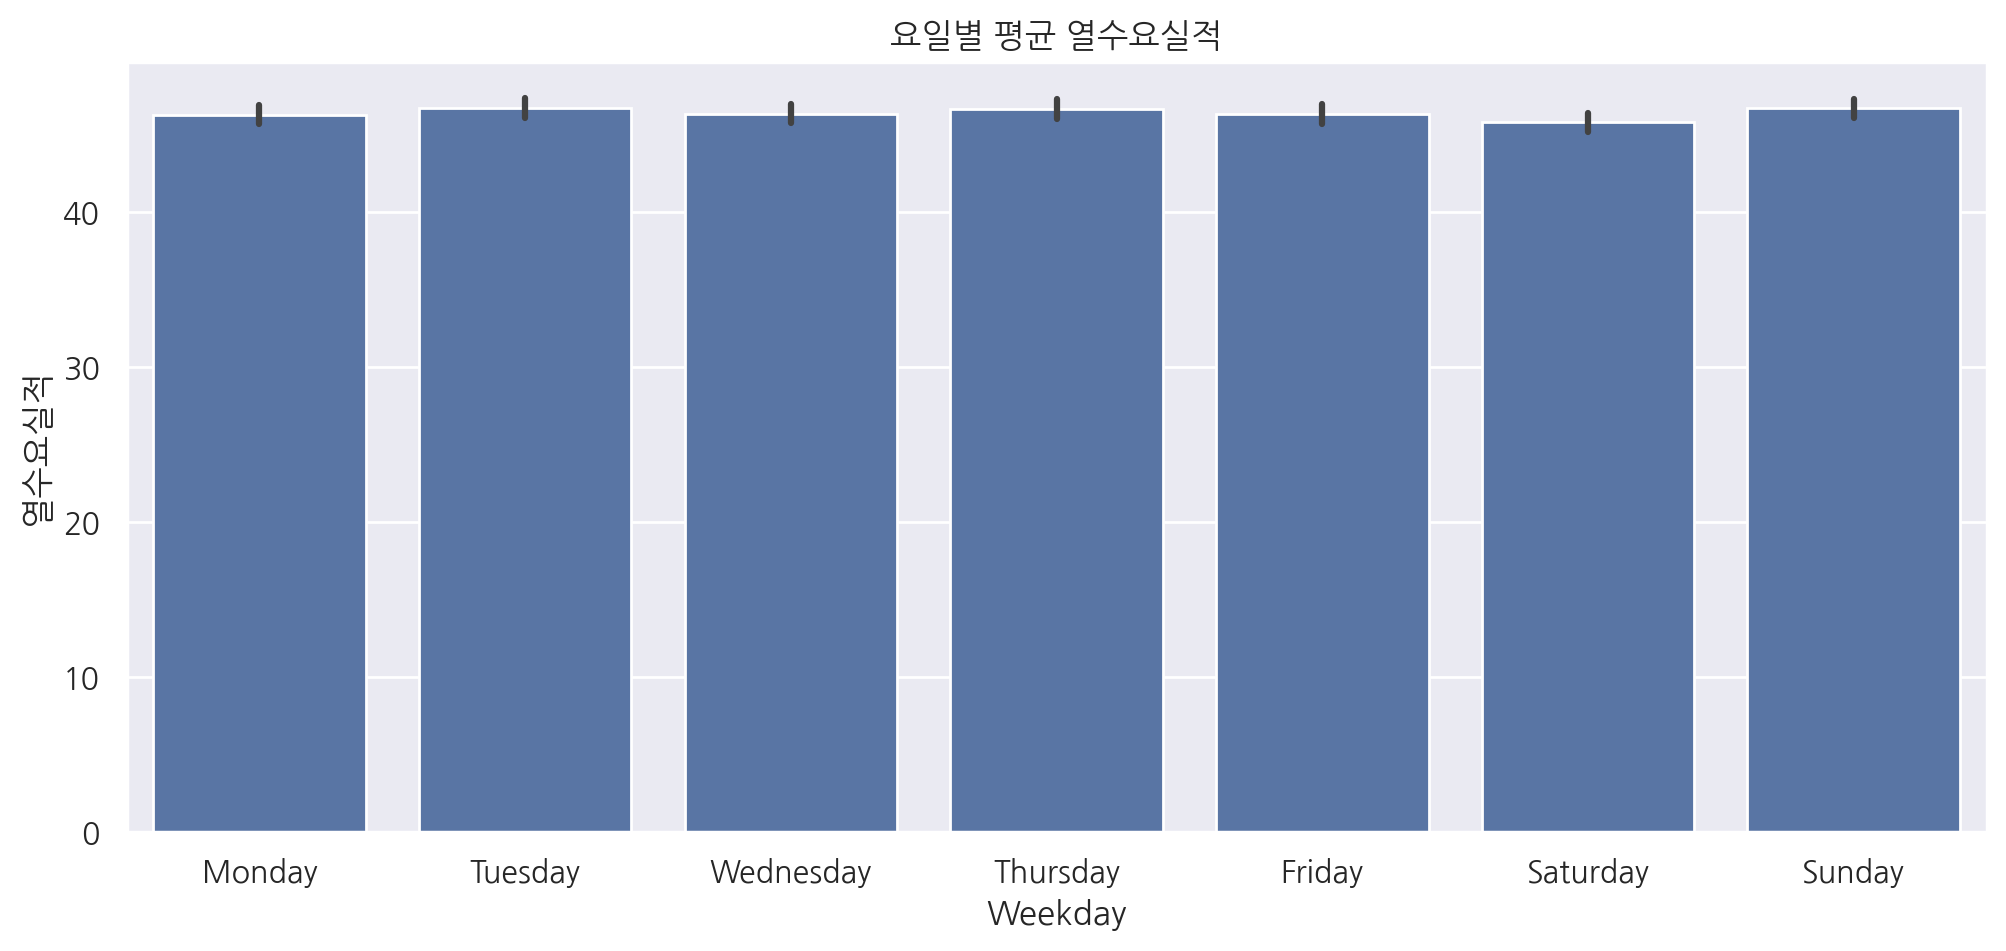

In [31]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 5))
sns.barplot(x='Weekday', y='열수요실적', data=df, order=weekday_order)
plt.title('요일별 평균 열수요실적')
plt.show()

*   요일별로 큰 차이가 없음.
*   즉, 열수요는 주중/주말 영향을 거의 받지 않음.  
이는 주거용 수요 비중이 높거나, 업무용이라 해도 일정한 소비 패턴을 가진 환경일 가능성.

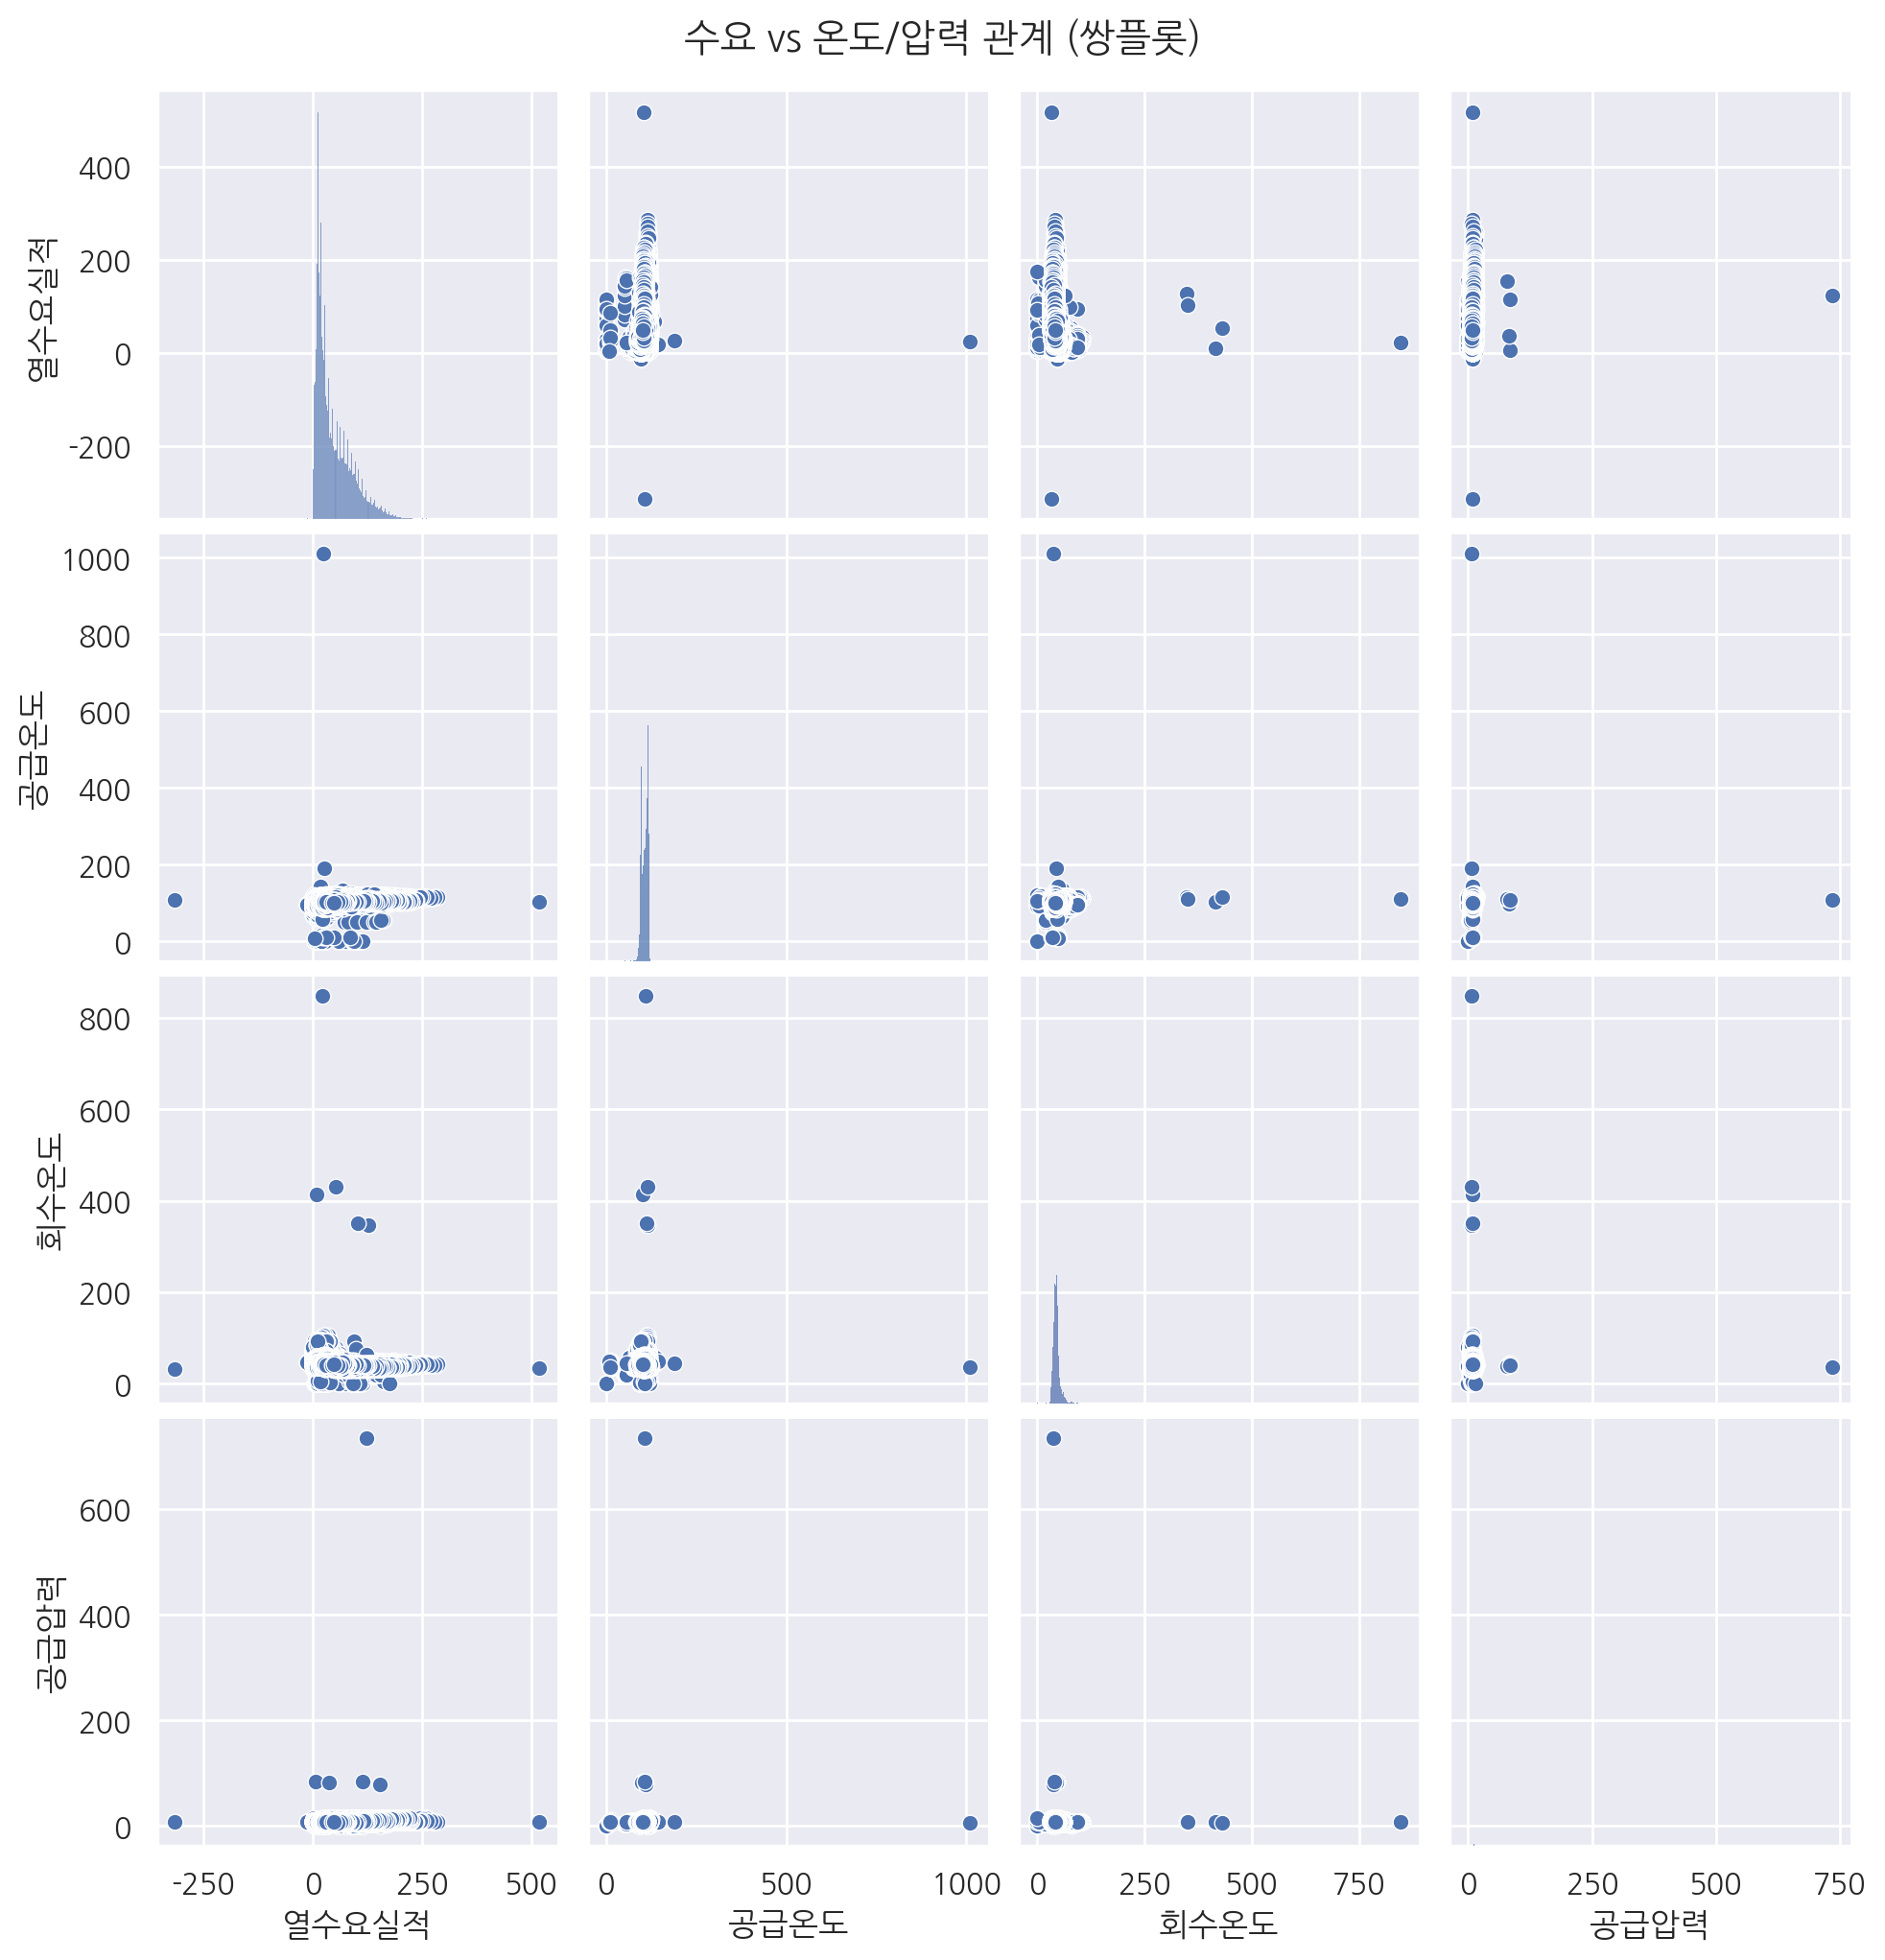

In [32]:
sns.pairplot(df[['열수요실적', '공급온도', '회수온도', '공급압력']].dropna())
plt.suptitle('수요 vs 온도/압력 관계 (쌍플롯)', y=1.02)
plt.show()

*   전반적으로 이상치가 존재함:
*   열수요실적에 음수 값 존재 (비정상적, 제거 필요)  
공급온도/회수온도 500~1000도 이상도 있음 → 물리적으로 가능하지 않음
일부 구간은 분산이 거의 없어서 정상 데이터는 좁은 범위에 밀집됨.

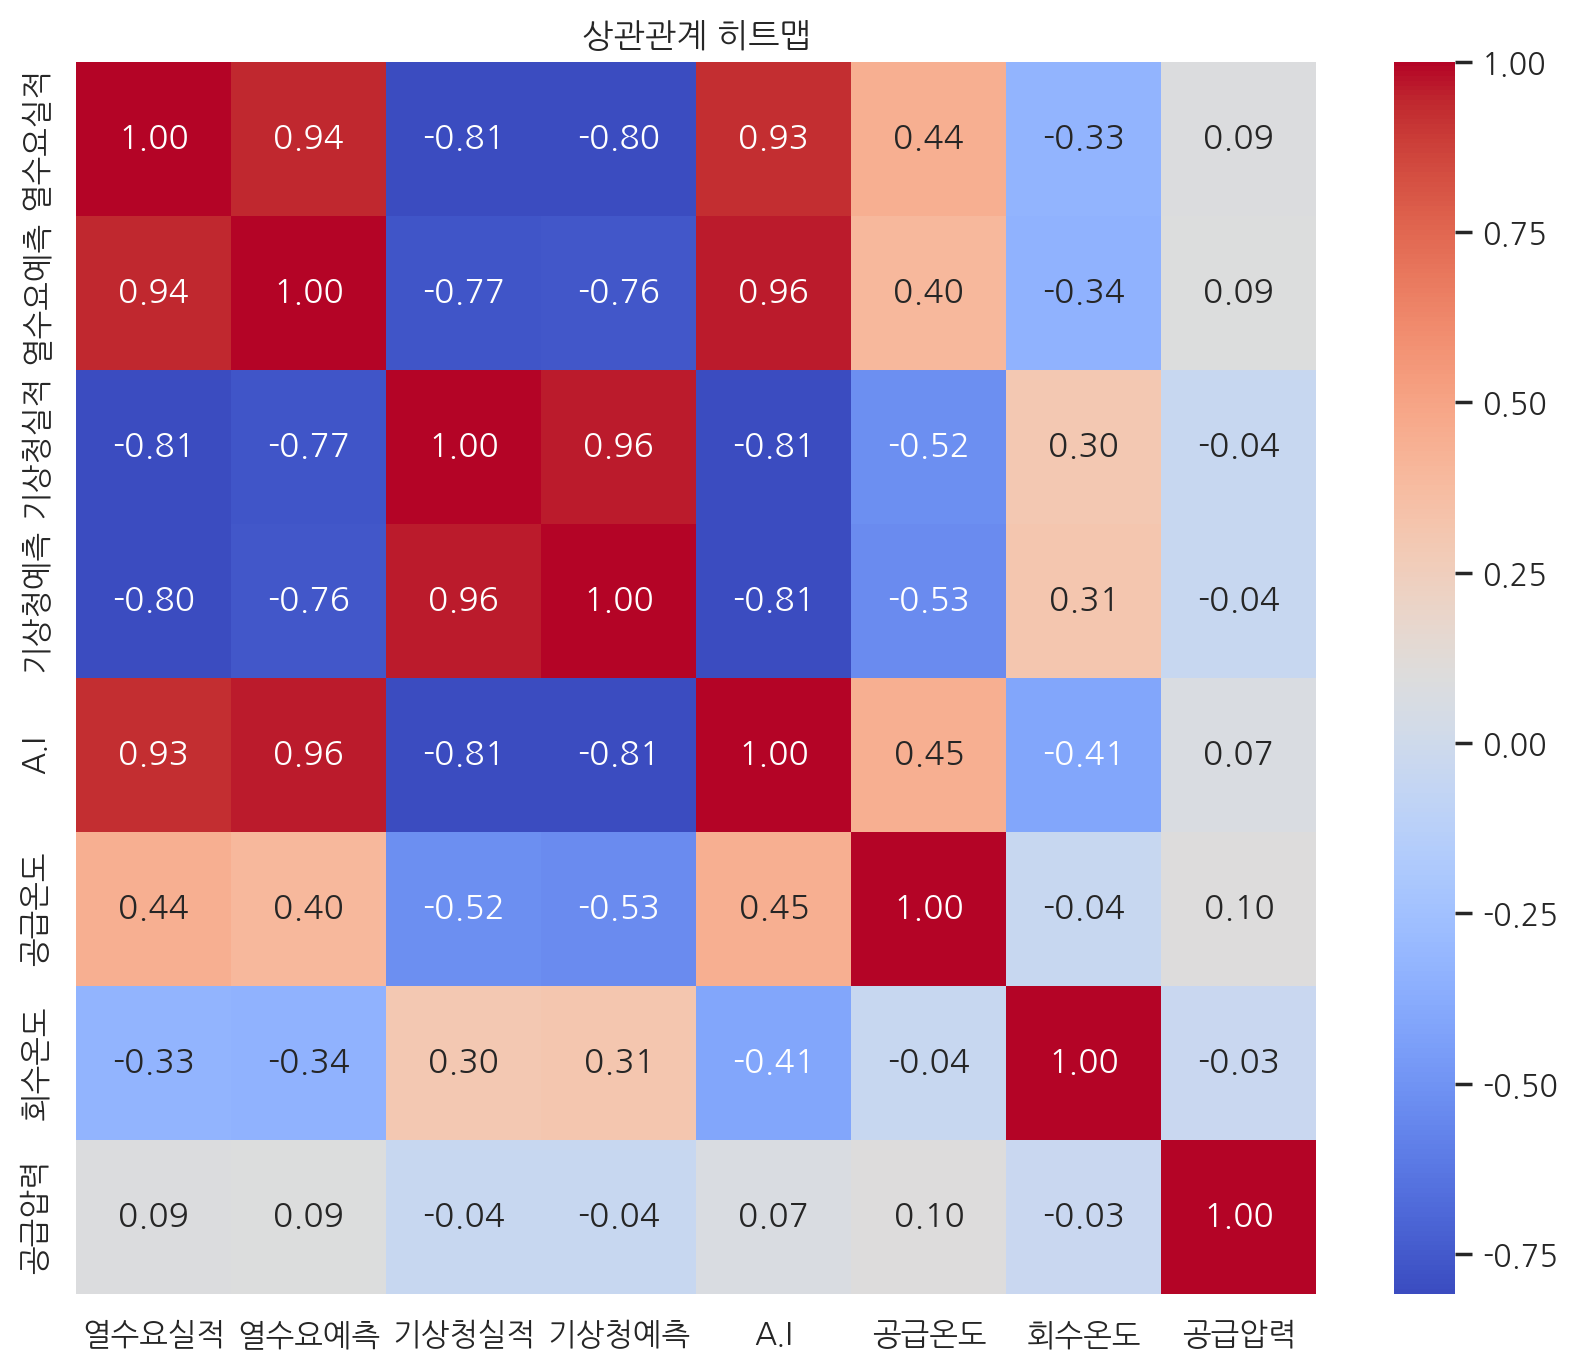

In [33]:
plt.figure(figsize=(10, 8))
corr = df[['열수요실적', '열수요예측', '기상청실적', '기상청예측', 'A.I', '공급온도', '회수온도', '공급압력']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("상관관계 히트맵")
plt.show()

*   열수요실적과 AI 예측, 열수요예측은 매우 높은 양의 상관관계 (0.93~0.96)
*   기상청실적, 기상청예측과는 음의 상관 (-0.8 이상) → 온도가 낮을수록 열수요 증가.
*   공급온도는 수요와 양의 상관관계, 회수온도는 약한 음의 상관.  
*   공급압력은 대부분 변수와 상관계수가 약함.